In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe Details

In [65]:
df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')
df

C:\Users\joeva\AppData\Local\Temp\ipykernel_21748\4142342760.py:1: DtypeWarning: Columns (26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')


,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,...,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
0,0,57,1,1,0 days 00:02:23.141000,0,NaN,52.533,0,45.335,...,Krohn Racing #57 Stint #1,143141,20.0,1.0,349.0,0.349,26.922,0.000,0.000,143.141
1,1,88,2,1,0 days 00:02:24.016000,0,NaN,52.915,0,45.342,...,Team Felbermayr-Proton #88 Stint #1,144016,21.0,2.0,875.0,0.875,27.797,0.875,0.875,144.016
2,2,50,2,1,0 days 00:02:25.278000,0,NaN,53.568,0,45.577,...,Larbre Competition #50 Stint #1,145278,22.0,3.0,1262.0,1.262,29.059,1.262,2.137,145.278
3,3,70,2,1,0 days 00:02:25.548000,0,NaN,53.938,0,45.614,...,Larbre Competition #70 Stint #1,145548,23.0,4.0,270.0,0.270,29.329,0.270,2.407,145.548
4,4,61,2,1,0 days 00:02:25.859000,0,NaN,54.482,0,45.816,...,AF Corse-Waltrip #61 Stint #1,145859,24.0,5.0,311.0,0.311,29.640,0.311,2.718,145.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503675,503675,7,3,378,0 days 00:03:32.801000,0,NaN,33.645,0,80.892,...,Toyota Gazoo Racing #7 Stint #33,86220663,2.0,2.0,121119.0,121.119,212.801,121.119,121.119,86220.663
503676,503676,8,2,379,0 days 00:03:32.310000,0,NaN,33.323,0,80.052,...,Toyota Gazoo Racing #8 Stint #32,86311854,1.0,1.0,91191.0,91.191,91.191,0.000,0.000,86311.854
503677,503677,7,3,379,0 days 00:03:33.348000,0,NaN,34.550,0,81.034,...,Toyota Gazoo Racing #7 Stint #33,86434011,2.0,2.0,122157.0,122.157,213.348,122.157,122.157,86434.011
503678,503678,8,2,380,0 days 00:03:36.142000,0,NaN,33.452,0,80.406,...,Toyota Gazoo Racing #8 Stint #32,86527996,1.0,1.0,93985.0,93.985,93.985,0.000,0.000,86527.996


In [66]:
df.shape

(503680, 48)

In [67]:
df.columns

Index(['Unnamed: 0', 'number', 'driver_number', 'lap_number', 'lap_time',
       'lap_improvement', 'crossing_finish_line_in_pit', 's1',
       's1_improvement', 's2', 's2_improvement', 's3', 's3_improvement', 'kph',
       'elapsed', 'hour', 's1_large', 's2_large', 's3_large', 'top_speed',
       'driver_name', 'pit_time', 'class', 'group', 'team', 'manufacturer',
       'season', 'circuit', 'round', 'vehicle', 'flag_at_fl', 'team_no',
       'lap_time_ms', 'lap_time_s', 'engine', 'driver_stint_no',
       'driver_stint', 'team_stint_no', 'team_stint', 'elapsed_ms', 'position',
       'class_position', 'interval_ms', 'interval', 'gap', 'class_interval',
       'class_gap', 'elapsed_s'],
      dtype='object')

In [68]:
# number: The car number that completed the lap
# driver_number: The driver of the car number that completed the lap
# lap_number: The lap number of the race the lap was completed at
# lap_time: The lap time recorded as they crossed the timing beam
# lap_improvement: Haven't looked into this, but my guess would a variable showing if the driver made improvement vs previous lap_times. Likely 0 is no improvement, 1 is green (personal best), 2 is purple (race best), and 3 is a WR? 99% of the laps have 0 improvement, so further research probably needed.
# crossing_finish_line_in_pit: boolean for if they crossed the finish line, B if they did, nan else
# s1, s2, s3 The sector times recorded as they crossed the timing beam (recorded in ss.mss)
# s1/s2/s3_improvement similar to lap_improvement
# s1/s2/s3_large: how they crossed the timing beams similar to lap_time
# kph: the average kph of the lap
# top_speed: the fastest recorded time of the lap
# driver_name: the driver that recorded the lap
# pit_time: the recorded time that was spent in the pitlane (typically followed by "B" in crossing_finish_line_in_pit)
# class: the class of the car that set the lap time
# group: the group of the car that set the lap time, only applicable to LMP1s and LMP2 Pro/Am (2021 season?)
# team: the team of the car that set the lap
# manufacturer: the manufacturer of the car that set the lap
# season: the WEC season the lap was set at
# circuit: the circuit the lap was set at
# round: the round (race number in the championship) the lap was set at
# vehicle: the car the lap was set with
# flag_at_fl: the flag status at the timing beam (only for 2022)
# lap_time_ms: The lap time recorded in milliseconds (seconds*1000)
# lap_time_s: the lap time recorded in seconds
# team_no: A combination of team and the team's number e.g Toyota Gazoo Racing #7
# engine: The engine of the car the lap was set with.
# driver_stint_no: Labeling the driver stint. A stint changes when the driver pits and either a. stays in the car, or b. swaps into the car.
# driver_stint: A combination of driver_name and the driver_stint_no, e.g. Mike CONWAY Stint #1
# team_stint_no: Labeling the team stint. A stint changes when the driver pits.
# team_stint: A combination of team_no and the team_stint_no, e.g. Toyota Gazoo Racing #7 Stint #1
# position: The position of the car at the time of the lap.
# class_position: The position of the car in class at the time of the lap.
# interval_ms: The interval (gap to the car in front for position) in ms
# interval: The interval (gap to the car in front for position) in s
# gap: The total time to the leader (time to 1st position overall) in s
# class_interval: The interval (gap to the car in front for position in class) in s
# class_gap The total time to the leader (time to 1st position in class) in s

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503680 entries, 0 to 503679
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   503680 non-null  int64  
 1   number                       503680 non-null  int64  
 2   driver_number                503680 non-null  int64  
 3   lap_number                   503680 non-null  int64  
 4   lap_time                     503680 non-null  object 
 5   lap_improvement              503680 non-null  int64  
 6   crossing_finish_line_in_pit  28445 non-null   object 
 7   s1                           503569 non-null  float64
 8   s1_improvement               503680 non-null  int64  
 9   s2                           503406 non-null  float64
 10  s2_improvement               503680 non-null  int64  
 11  s3                           503486 non-null  float64
 12  s3_improvement               503680 non-null  int64  
 13 

In [70]:
df.describe()

,Unnamed: 0,number,driver_number,lap_number,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
count,503680.00000,503680.000000,503680.000000,503680.000000,503680.000000,503569.000000,503680.000000,503406.000000,503680.000000,503486.000000,...,503680.000000,5.036800e+05,503680.000000,503680.000000,5.036800e+05,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000
mean,251839.50000,53.766256,1.341775,118.358517,0.010076,44.221335,0.018857,63.995318,0.018887,65.954284,...,8.182618,2.251623e+07,18.534333,5.700790,1.589048e+05,158.904821,2179.684949,131.506613,420.611197,22516.229955
std,145400.03613,67.623157,0.940485,83.514817,0.143167,111.896698,0.170342,29.421726,0.170484,48.209154,...,8.055612,2.175151e+07,12.772971,4.364912,5.976172e+05,597.617202,2859.444803,582.349385,985.250399,21751.510146
min,0.00000,0.000000,0.000000,1.000000,0.000000,16.690000,0.000000,25.266000,0.000000,15.220000,...,0.000000,8.438800e+04,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,84.388000
25%,125919.75000,25.000000,1.000000,52.000000,0.000000,33.644000,0.000000,42.750000,0.000000,35.252000,...,3.000000,7.497529e+06,8.000000,2.000000,6.773000e+03,6.773000,338.071750,2.748000,15.846000,7497.528750
50%,251839.50000,47.000000,1.000000,104.000000,0.000000,36.712000,0.000000,52.883500,0.000000,44.798000,...,5.000000,1.514634e+07,17.000000,5.000000,3.163300e+04,31.633000,1182.121000,20.409000,96.684500,15146.341500
75%,377759.25000,77.000000,2.000000,166.000000,0.000000,39.343000,0.000000,85.384000,0.000000,102.728000,...,10.000000,2.769537e+07,26.000000,8.000000,1.165655e+05,116.565500,2634.542250,83.238250,375.221000,27695.366750
max,503679.00000,777.000000,3.000000,395.000000,3.000000,18025.929000,3.000000,3646.889000,3.000000,3653.638000,...,50.000000,8.692520e+07,62.000000,27.000000,2.455741e+07,24557.407000,40495.937000,24557.407000,27002.532000,86925.196000


## Preprocessing

In [71]:
df.drop_duplicates()

,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,...,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
0,0,57,1,1,0 days 00:02:23.141000,0,NaN,52.533,0,45.335,...,Krohn Racing #57 Stint #1,143141,20.0,1.0,349.0,0.349,26.922,0.000,0.000,143.141
1,1,88,2,1,0 days 00:02:24.016000,0,NaN,52.915,0,45.342,...,Team Felbermayr-Proton #88 Stint #1,144016,21.0,2.0,875.0,0.875,27.797,0.875,0.875,144.016
2,2,50,2,1,0 days 00:02:25.278000,0,NaN,53.568,0,45.577,...,Larbre Competition #50 Stint #1,145278,22.0,3.0,1262.0,1.262,29.059,1.262,2.137,145.278
3,3,70,2,1,0 days 00:02:25.548000,0,NaN,53.938,0,45.614,...,Larbre Competition #70 Stint #1,145548,23.0,4.0,270.0,0.270,29.329,0.270,2.407,145.548
4,4,61,2,1,0 days 00:02:25.859000,0,NaN,54.482,0,45.816,...,AF Corse-Waltrip #61 Stint #1,145859,24.0,5.0,311.0,0.311,29.640,0.311,2.718,145.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503675,503675,7,3,378,0 days 00:03:32.801000,0,NaN,33.645,0,80.892,...,Toyota Gazoo Racing #7 Stint #33,86220663,2.0,2.0,121119.0,121.119,212.801,121.119,121.119,86220.663
503676,503676,8,2,379,0 days 00:03:32.310000,0,NaN,33.323,0,80.052,...,Toyota Gazoo Racing #8 Stint #32,86311854,1.0,1.0,91191.0,91.191,91.191,0.000,0.000,86311.854
503677,503677,7,3,379,0 days 00:03:33.348000,0,NaN,34.550,0,81.034,...,Toyota Gazoo Racing #7 Stint #33,86434011,2.0,2.0,122157.0,122.157,213.348,122.157,122.157,86434.011
503678,503678,8,2,380,0 days 00:03:36.142000,0,NaN,33.452,0,80.406,...,Toyota Gazoo Racing #8 Stint #32,86527996,1.0,1.0,93985.0,93.985,93.985,0.000,0.000,86527.996


In [72]:
df.isna().sum()

Unnamed: 0                          0
number                              0
driver_number                       0
lap_number                          0
lap_time                            0
lap_improvement                     0
crossing_finish_line_in_pit    475235
s1                                111
s1_improvement                      0
s2                                274
s2_improvement                      0
s3                                194
s3_improvement                      0
kph                                 0
elapsed                             0
hour                                0
s1_large                          116
s2_large                          281
s3_large                          201
top_speed                        1949
driver_name                         0
pit_time                       475036
class                               0
group                          423118
team                                0
manufacturer                        0
season      

#### Droping & filling

In [73]:
# removing columns with large number of missing values
df.drop(columns=['crossing_finish_line_in_pit','group','flag_at_fl'],axis=1,inplace=True)


In [74]:
print(df['s1_large'].unique())
print(df['s2_large'].unique())
print(df['s3_large'].unique())

['0 days 00:00:52.533000' '0 days 00:00:52.915000'
 '0 days 00:00:53.568000' ... '0 days 00:01:41.860000'
 '0 days 00:01:12.238000' '0 days 00:01:12.609000']
['0 days 00:00:45.335000' '0 days 00:00:45.342000'
 '0 days 00:00:45.577000' ... '0 days 00:01:08.016000'
 '0 days 00:01:02.657000' '0 days 00:01:01.822000']
['0 days 00:00:45.273000' '0 days 00:00:45.759000'
 '0 days 00:00:46.133000' ... '0 days 00:01:26.621000'
 '0 days 00:01:26.098000' '0 days 00:01:02.427000']


In [75]:
# fill missing values
df['s1']=df['s1'].fillna(df['s1'].mean())
df['s2']=df['s2'].fillna(df['s2'].mean())
df['s3']=df['s3'].fillna(df['s3'].mean())
df['top_speed']=df['top_speed'].fillna(df['top_speed'].median())
df['s1_large']=df['s1_large'].fillna(df['s1_large'].mode()[0])
df['s2_large']=df['s2_large'].fillna(df['s2_large'].mode()[0])
df['s3_large']=df['s3_large'].fillna(df['s3_large'].mode()[0])

df.isna().sum()

Unnamed: 0              0
number                  0
driver_number           0
lap_number              0
lap_time                0
lap_improvement         0
s1                      0
s1_improvement          0
s2                      0
s2_improvement          0
s3                      0
s3_improvement          0
kph                     0
elapsed                 0
hour                    0
s1_large                0
s2_large                0
s3_large                0
top_speed               0
driver_name             0
pit_time           475036
class                   0
team                    0
manufacturer            0
season                  0
circuit                 0
round                   0
vehicle                 0
team_no                 0
lap_time_ms             0
lap_time_s              0
engine                  0
driver_stint_no         0
driver_stint            0
team_stint_no           0
team_stint              0
elapsed_ms              0
position                0
class_positi

In [76]:
df['pit_time'].unique()

array([nan, '0:00:30', '0:23:05', ..., '0:01:27.031', '0:01:06.274',
       '0:01:04.940'], shape=(20358,), dtype=object)

In [77]:
# filling missing values in pit_time as 0 as it affects lap time

df['pit_time']=df['pit_time'].fillna(0)
df['pit_time']

0         0
1         0
2         0
3         0
4         0
         ..
503675    0
503676    0
503677    0
503678    0
503679    0
Name: pit_time, Length: 503680, dtype: object

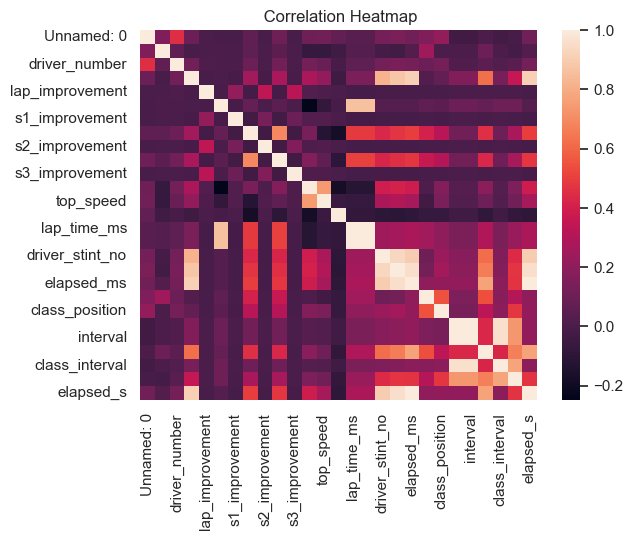

In [78]:
corrilation=df.corr(numeric_only=True)
sns.heatmap(corrilation)
plt.title(' Correlation Heatmap')
plt.show()

In [79]:
# removing unwanted and duplicate columns
df.drop(columns=['Unnamed: 0','number','lap_improvement','s1_large','s2_large','s3_large',
                 's1_improvement','s2_improvement','s3_improvement','driver_name','team',
                 'engine','round','vehicle','lap_time','lap_time_ms','interval_ms',
                 'gap','class_gap','class_interval','interval','elapsed','elapsed_s',
                 'elapsed_ms'],axis=1,inplace=True)
df.shape

(503680, 21)

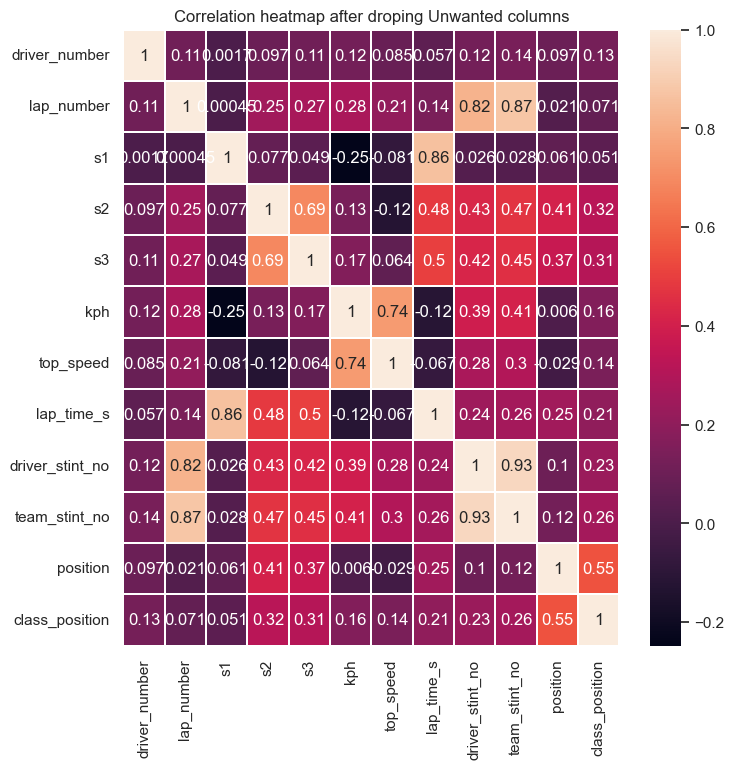

In [80]:
plt.figure(figsize=(8,8))
corrilation=df.corr(numeric_only=True)
sns.heatmap(corrilation,annot=True,linewidths=0.25, linecolor='white')
plt.title('Correlation heatmap after droping Unwanted columns')
plt.show()

#### Dtype conversions

In [81]:
l=df['manufacturer'].unique()
print(len(l))

35


In [82]:
l=df['team_no'].unique()
print(len(l))

322


In [83]:
l=df['team_stint'].unique()
print(len(l))

9536


In [84]:
df['season'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, '2017', '2018-2019',
       '2019-2020', '2021', 2021, 2022], dtype=object)

In [85]:
#converting season from object to int dtype
df['season']=df['season'].astype(str)
df[['season_start','season_end']]=df['season'].str.split('-',expand=True)
df['season_start']=df['season_start'].astype(int)
df['season_start'].value_counts()

season_start
2018    69443
2016    62095
2012    54432
2017    53964
2019    52972
2015    52702
2021    50051
2014    43644
2013    34083
2022    30294
Name: count, dtype: int64

In [86]:
# removing season and season_end
df.drop(columns=['season','season_end'],axis=1,inplace=True)
df.dtypes

driver_number        int64
lap_number           int64
s1                 float64
s2                 float64
s3                 float64
kph                float64
hour                object
top_speed          float64
pit_time            object
class               object
manufacturer        object
circuit             object
team_no             object
lap_time_s         float64
driver_stint_no      int64
driver_stint        object
team_stint_no        int64
team_stint          object
position           float64
class_position     float64
season_start         int64
dtype: object

In [87]:
df['hour']

0                10:33
1                10:33
2                10:33
3                10:33
4                10:33
              ...     
503675    15:57:00.663
503676    15:58:31.854
503677    16:00:34.011
503678    16:02:07.996
503679    16:04:09.218
Name: hour, Length: 503680, dtype: object

In [88]:
# # extracting hour for hour column
# # Convert hour to datetime format then to seconds

def convert_time(time_str):
    
    time_formats=['%M:%S.%f', '%M:%S', '%H:%M:%S.%f', '%H:%M:%S', '%H:%M']
    
    for i in time_formats:
        try:
            time_obj=pd.to_datetime(time_str,format=i,errors='raise')
            # Debugging to check if parsing works
            #print(f"Parsed '{time_str}' with format '{i}'")
            
            #convert to seconds
            sec=(time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second + (time_obj.microsecond / 1_000_000)
            return sec
        except ValueError:
            continue
    print(f"Failed to parse '{time_str}'")  # Check which values failed 
    return None

df['hour_s']=df['hour'].apply(convert_time)

df['hour_s']


0           633.000
1           633.000
2           633.000
3           633.000
4           633.000
            ...    
503675    57420.663
503676    57511.854
503677    57634.011
503678    57727.996
503679    57849.218
Name: hour_s, Length: 503680, dtype: float64

In [89]:
df.drop('hour',axis=1,inplace=True)

In [90]:
df['pit_time'].unique()

array([0, '0:00:30', '0:23:05', ..., '0:01:27.031', '0:01:06.274',
       '0:01:04.940'], shape=(20358,), dtype=object)

In [91]:
# converting pit_time to int 

df['pit_time'] = df['pit_time'].str.strip()

print(df['pit_time'].dtype)

df['pit_time'] = df['pit_time'].astype(str)

df['pit_time'] = df['pit_time'].apply(convert_time)

print(df['pit_time'].unique())

print(df['pit_time'].isna().sum())


object
[     nan   30.    1385.    ...   87.031   66.274   64.94 ]
475036


In [92]:
#Filling missing values as 0 in pit time
df['pit_time']=df['pit_time'].fillna(0.0)
print(df['pit_time'].isna().sum())
print(df['pit_time'].unique())

0
[   0.      30.    1385.    ...   87.031   66.274   64.94 ]


In [93]:
j = df[df['lap_time_s'] >= 15000].index
df.drop(j, inplace=True)
df=df.reset_index(drop=True)
df.shape

(503678, 21)

#### Encoding

In [94]:
# coverting all strings to lowercase and removes  digits, whitespaces and the hour from circuits
import re
cols = ['circuit', 'manufacturer']
df['circuit'] = df['circuit'].str.replace(r'\d+', '', regex=True)
df['circuit'] = [re.sub(r'(?i)\b(hours?)\b', '', s).strip() for s in df['circuit']]
df[cols] = df[cols].apply(lambda x: x.str.lower().str.replace(' ', '_', regex=True))
df['circuit'].unique()

array(['sebring', 'spa_francorchamps', 'le_mans', 'interlagos',
       'silverstone', 'bahrain_international_circuit', 'fuji_speedway',
       'shanghai_international_circuit', 'circuit_of_the_americas',
       'nurburgring', 'autodromo_hermanos_rodriguez',
       'autodromo_do_algarve', 'autodromo_nazionale_di_monza'],
      dtype=object)

In [95]:
cols = ['circuit', 'manufacturer']
df[cols] = df[cols].apply(lambda x: x.str.replace(' ','_'))
df[cols]

,circuit,manufacturer
0,sebring,ferrari
1,sebring,porsche
2,sebring,chevrolet
3,sebring,chevrolet
4,sebring,ferrari
...,...,...
503673,le_mans,toyota
503674,le_mans,toyota
503675,le_mans,toyota
503676,le_mans,toyota


##### One-hotencoding

In [96]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(sparse_output=False, drop='first')

o_h_cols=['circuit','manufacturer']
encoded_df=OHE.fit_transform(df[o_h_cols])
encoded_df = pd.DataFrame(encoded_df, columns=OHE.get_feature_names_out(o_h_cols))


##### TargetEncoding

In [97]:
from category_encoders import TargetEncoder

# Separate encoders for each column
manufacturer_encoder = TargetEncoder()
team_no_encoder = TargetEncoder()

encoded_df['manufacturer'] = manufacturer_encoder.fit_transform(df['manufacturer'], df['lap_time_s'])
encoded_df['team_no'] = team_no_encoder.fit_transform(df['team_no'], df['lap_time_s'])


In [98]:
import pickle

# Save them after fitting
with open("manufacturer_target_encoding.pkl", "wb") as f:
    pickle.dump(manufacturer_encoder, f)

with open("team_no_target_encoding.pkl", "wb") as f:
    pickle.dump(team_no_encoder, f)


##### Ordinal Encoding

In [99]:
from sklearn.preprocessing import OrdinalEncoder
class_order = ['LMP1-H', 'LMP1-L', 'LMP1', 'HYPERCAR', 'LMP2', 'INNOVATIVE CAR', 'LMGTE Pro', 'LMGTE Am', 'CDNT']
# Values= 0 - 8 in order
OrderEncode=OrdinalEncoder(categories=[class_order])
encoded_df['class']=OrderEncode.fit_transform(df[['class']])

##### Label Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

encoded_df['team_stint']=label.fit_transform(df['team_stint'])
encoded_df['driver_stint']=label.fit_transform(df['driver_stint'])
encoded_df['team_no']=label.fit_transform(df['team_no'])

In [101]:
encoded_df.describe()

,circuit_autodromo_hermanos_rodriguez,circuit_autodromo_nazionale_di_monza,circuit_bahrain_international_circuit,circuit_circuit_of_the_americas,circuit_fuji_speedway,circuit_interlagos,circuit_le_mans,circuit_nurburgring,circuit_sebring,circuit_shanghai_international_circuit,...,manufacturer_riley,manufacturer_srt,manufacturer_strakka,manufacturer_toyota,manufacturer_zytek,manufacturer,team_no,class,team_stint,driver_stint
count,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,...,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000,503678.000000
mean,0.023124,0.012998,0.105282,0.052357,0.078717,0.029646,0.370379,0.032088,0.042573,0.065881,...,0.000619,0.000604,0.000310,0.057052,0.011527,174.357986,147.255757,4.764538,4340.298210,4040.437837
std,0.150297,0.113267,0.306916,0.222746,0.269297,0.169609,0.482907,0.176234,0.201892,0.248075,...,0.024881,0.024560,0.017596,0.231943,0.106744,16.743707,100.698216,1.898822,2957.779392,2347.083916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.908537,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,164.761419,45.000000,4.000000,1348.000000,2029.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,176.493569,148.000000,4.000000,4411.000000,4156.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.917455,236.000000,7.000000,6921.000000,5995.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,336.805300,321.000000,8.000000,9535.000000,8224.000000


In [102]:
df1=df.drop(columns=['circuit','manufacturer','team_no','class','team_stint','driver_stint'])
print('df1 shape ',df1.shape,"\n\n")
print('encoded_df shape ',encoded_df.shape,"\n\n")
joined_df=pd.concat((df1,encoded_df),axis=1)
joined_df

df1 shape  (503678, 15) 


encoded_df shape  (503678, 49) 




,driver_number,lap_number,s1,s2,s3,kph,top_speed,pit_time,lap_time_s,driver_stint_no,...,manufacturer_riley,manufacturer_srt,manufacturer_strakka,manufacturer_toyota,manufacturer_zytek,manufacturer,team_no,class,team_stint,driver_stint
0,1,1,52.533,45.335,45.273,151.4,247.6,0.0,143.141,1,...,0.0,0.0,0.0,0.0,0.0,185.917455,163,7.0,4853,5366
1,2,1,52.915,45.342,45.759,150.4,220.4,0.0,144.016,1,...,0.0,0.0,0.0,0.0,0.0,171.407830,283,7.0,8345,5844
2,2,1,53.568,45.577,46.133,149.1,233.6,0.0,145.278,1,...,0.0,0.0,0.0,0.0,0.0,208.327825,164,7.0,4883,6077
3,2,1,53.938,45.614,45.996,148.8,218.3,0.0,145.548,1,...,0.0,0.0,0.0,0.0,0.0,208.327825,165,7.0,4921,5857
4,2,1,54.482,45.816,45.561,148.5,224.0,0.0,145.859,1,...,0.0,0.0,0.0,0.0,0.0,185.917455,13,7.0,361,6869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503673,3,378,33.645,80.892,98.264,230.5,290.0,0.0,212.801,13,...,0.0,0.0,0.0,1.0,0.0,145.606279,302,3.0,8879,3369
503674,2,379,33.323,80.052,98.935,231.0,334.9,0.0,212.310,12,...,0.0,0.0,0.0,1.0,0.0,145.606279,303,3.0,8917,949
503675,3,379,34.550,81.034,97.764,229.9,331.8,0.0,213.348,13,...,0.0,0.0,0.0,1.0,0.0,145.606279,302,3.0,8879,3369
503676,2,380,33.452,80.406,102.284,227.0,331.8,0.0,216.142,12,...,0.0,0.0,0.0,1.0,0.0,145.606279,303,3.0,8917,949


#### Heatmap

In [103]:
cols2=['driver_number', 'lap_number', 's1', 's2', 's3', 'kph',
    'top_speed', 'pit_time', 'driver_stint_no','team_stint_no',
    'driver_stint','team_stint', 'position', 'class_position',
    'season_start', 'hour_s','class','lap_time_s'
]
corrilation2=joined_df[cols2].corr(numeric_only=True)
corrilation2

,driver_number,lap_number,s1,s2,s3,kph,top_speed,pit_time,driver_stint_no,team_stint_no,driver_stint,team_stint,position,class_position,season_start,hour_s,class,lap_time_s
driver_number,1.000000,0.112885,0.002005,0.096774,0.111178,0.122696,0.084833,0.004342,0.119045,0.137499,-0.055537,0.052636,0.096543,0.125231,0.441461,0.262992,0.058365,0.059151
lap_number,0.112885,1.000000,-0.000357,0.251103,0.273339,0.278330,0.210123,0.017177,0.816776,0.874653,0.005438,0.032126,0.020650,0.071213,0.078242,-0.059069,-0.027992,0.143982
s1,0.002005,-0.000357,1.000000,0.078838,0.050533,-0.257530,-0.083736,0.805711,0.025920,0.028535,0.002453,-0.002483,0.063806,0.052959,-0.001466,-0.005520,0.009577,0.851056
s2,0.096774,0.251103,0.078838,1.000000,0.690150,0.134682,-0.124648,0.049359,0.429684,0.471494,0.022463,-0.010368,0.407139,0.320658,0.079949,-0.051679,0.142741,0.501535
s3,0.111178,0.273339,0.050533,0.690150,1.000000,0.166155,0.063595,0.050035,0.421744,0.454563,0.023857,0.006894,0.366032,0.308619,0.111725,-0.032032,0.107611,0.521258
kph,0.122696,0.278330,-0.257530,0.134682,0.166155,1.000000,0.742541,-0.216013,0.386204,0.408236,0.022997,0.114574,0.006017,0.162781,0.118944,-0.015871,-0.228884,-0.117884
top_speed,0.084833,0.210123,-0.083736,-0.124648,0.063595,0.742541,1.000000,-0.025254,0.278809,0.299239,0.019595,0.095554,-0.028929,0.141359,0.124108,0.018940,-0.217259,-0.068590
pit_time,0.004342,0.017177,0.805711,0.049359,0.050035,-0.216013,-0.025254,1.000000,0.036591,0.039453,0.002647,0.003695,0.057992,0.058001,-0.004148,-0.008675,-0.008140,0.719002
driver_stint_no,0.119045,0.816776,0.025920,0.429684,0.421744,0.386204,0.278809,0.036591,1.000000,0.932284,0.027034,0.051059,0.101295,0.232314,0.118772,-0.087916,-0.057238,0.251372
team_stint_no,0.137499,0.874653,0.028535,0.471494,0.454563,0.408236,0.299239,0.039453,0.932284,1.000000,0.026094,0.057484,0.121853,0.260169,0.136071,-0.090865,-0.057717,0.273094


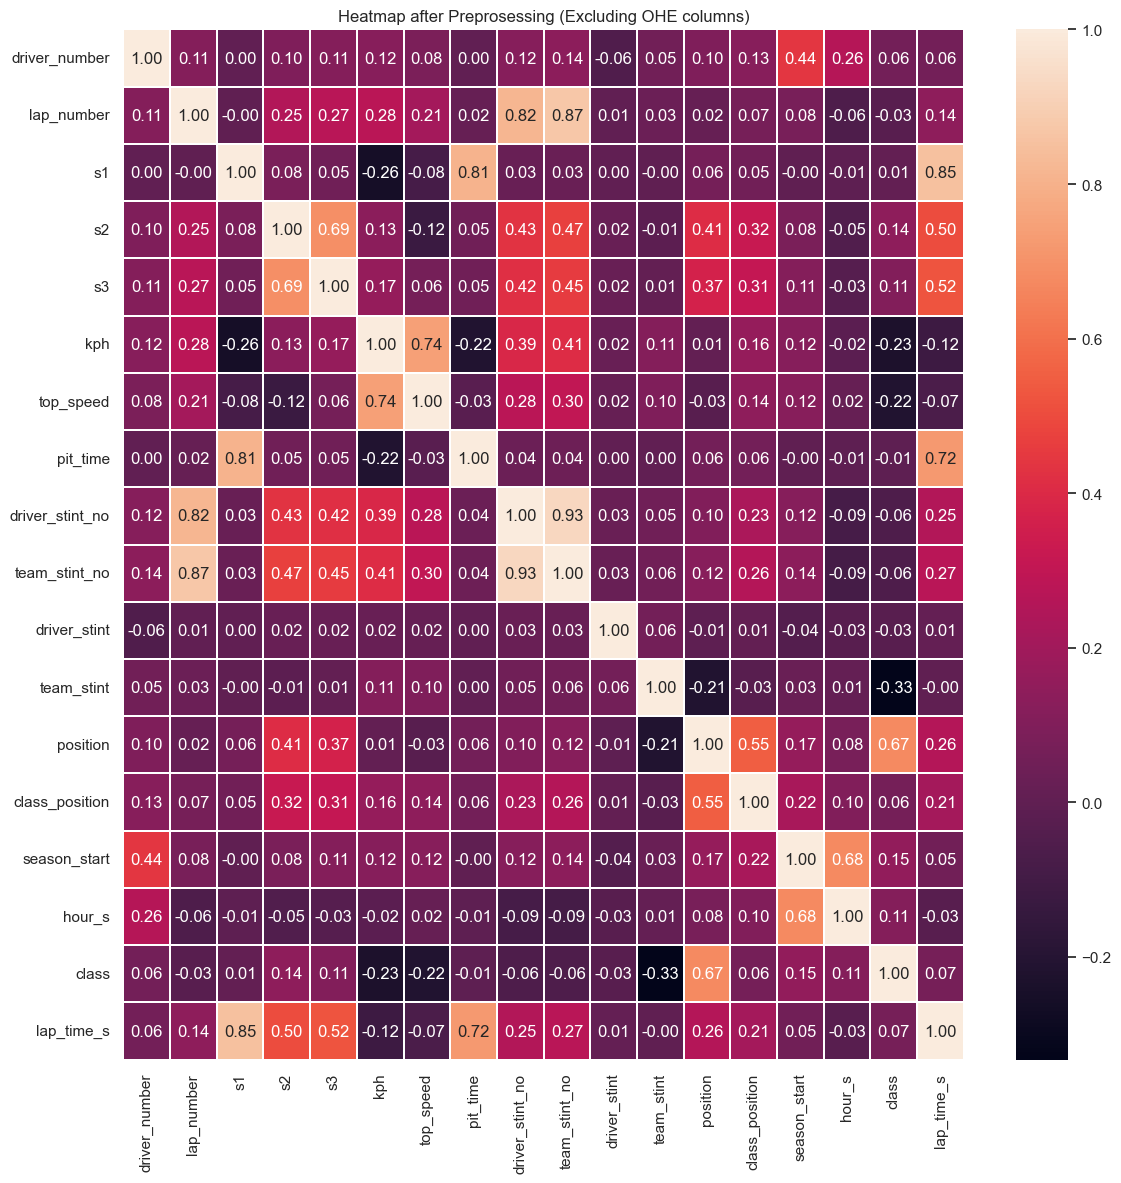

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(corrilation2,annot=True,linecolor='White',linewidths=0.25, fmt=".2f")
plt.title('Heatmap after Preprosessing (Excluding OHE columns)')
plt.tight_layout()
plt.show()

In [105]:
# dropping features with low corillation values

joined_df.drop(columns=['driver_stint','team_stint','hour_s','s1','s2','s3','driver_number','class_position'],axis=1,inplace=True)

## Model Creation

In [106]:
x=joined_df.drop('lap_time_s',axis=1)
y=joined_df['lap_time_s']

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [108]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [109]:
print("Linear Regression")
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred1))
print("RMSE :",root_mean_squared_error(y_test,y_pred1))
print("R2_Score :",r2_score(y_test,y_pred1))

Linear Regression
MAPE : 0.05386015697863747
RMSE : 69.39683983961304
R2_Score : 0.7564895802040698


In [110]:
from sklearn.tree import DecisionTreeRegressor


# Optional: reduce complexity
model = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=5)

model.fit(x_train, y_train)
y_pred3 = model.predict(x_test)
print("Decision Tree\n")
print("MAPE :", mean_absolute_percentage_error(y_test, y_pred3))
print("RMSE :", np.sqrt(root_mean_squared_error(y_test, y_pred3)))
print("R2_Score :", r2_score(y_test, y_pred3))




Decision Tree

MAPE : 0.014465010015098334
RMSE : 3.8250261923765136
R2_Score : 0.9891762983031468


In [111]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=201)
model.fit(x_train,y_train)
y_pred2=model.predict(x_test)
print("KNN\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred2))
print("RMSE :",root_mean_squared_error(y_test,y_pred2))
print("R2_Score :",r2_score(y_test,y_pred2))

KNN

MAPE : 0.0837063317539758
RMSE : 76.12619571302707
R2_Score : 0.7069738255542342


In [112]:
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

model = RandomForestRegressor(n_estimators=50, random_state=42,max_depth=15,min_samples_leaf=4,n_jobs=-1)
model.fit(x_train,y_train)
y_pred4=model.predict(x_test)
print("Random Forest\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred4))
print("RMSE :",root_mean_squared_error(y_test,y_pred4))
print("R2_Score :",r2_score(y_test,y_pred4))

# Save using joblib with compression
dump(model, "Lap_Time_Prediction.pkl", compress=9)

Random Forest

MAPE : 0.0033427109618263543
RMSE : 14.336019763643506
R2_Score : 0.989608090808754


['Lap_Time_Prediction.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred5=model.predict(x_test)
print("Gradient Boosting\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred5))
print("RMSE :",root_mean_squared_error(y_test,y_pred5))
print("R2_Score :",r2_score(y_test,y_pred5))
print(y_pred5)

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred6=model.predict(x_test)
print("X G Boost\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred6))
print("RMSE :",root_mean_squared_error(y_test,y_pred6))
print("R2_Score :",r2_score(y_test,y_pred6))
print(y_pred6)

X G Boost

MAPE : 0.005723741523642789
RMSE : 47.10654973857945
R2_Score : 0.8877979600189811
[238.3915   270.2824   117.6837   ... 124.086334 223.39017   89.086365]


In [ ]:
difference=pd.DataFrame({'Actual_laptime':y_test,
                         'Linear_Reg_Predicted':y_pred1,'Linear_Reg_Difference':(y_test-y_pred1),
                         'KNN_Predicted':y_pred2,'KNN_Difference':(y_test-y_pred2),
                         'Decision_Tree_Predicted':y_pred3,'Decision_Tree_Difference':(y_test-y_pred3),
                         'Random_Forest_Predicted':y_pred4,'Random_Forest_Difference':(y_test-y_pred4),
                         'Gradient_Boost_Predicted':y_pred5,'Gradient_Boost_Difference':(y_test-y_pred5),
                         'XG_Boost_Predicted':y_pred6,'XG_Boost_Difference':(y_test-y_pred6)})
difference

,Actual_laptime,Linear_Reg_Predicted,Linear_Reg_Difference,KNN_Predicted,KNN_Difference,Decision_Tree_Predicted,Decision_Tree_Difference,Random_Forest_Predicted,Random_Forest_Difference,Gradient_Boost_Predicted,Gradient_Boost_Difference,XG_Boost_Predicted,XG_Boost_Difference
496339,237.622,232.088162,5.533838,237.580358,0.041642,237.570005,0.051995,237.659487,-0.037487,237.709119,-0.087119,238.391495,-0.769495
308809,270.484,340.216819,-69.732819,278.780254,-8.296254,270.657230,-0.173230,270.424077,0.059923,266.131385,4.352615,270.282410,0.201590
236807,117.666,116.593450,1.072550,112.234388,5.431612,117.069340,0.596660,116.872636,0.793364,115.136288,2.529712,117.683701,-0.017701
314329,236.963,234.971872,1.991128,238.860940,-1.897940,236.822158,0.140842,236.975228,-0.012228,238.084939,-1.121939,236.432571,0.530429
452540,223.830,222.273144,1.556856,217.825746,6.004254,224.126883,-0.296883,223.793262,0.036738,222.487126,1.342874,223.489502,0.340498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72612,225.801,226.310800,-0.509800,226.569861,-0.768861,225.615726,0.185274,225.804176,-0.003176,226.621127,-0.820127,226.078812,-0.277812
310308,214.030,207.660363,6.369637,218.709502,-4.679502,213.898000,0.132000,214.022060,0.007940,215.104726,-1.074726,213.880112,0.149888
294163,123.864,125.215399,-1.351399,112.980791,10.883209,124.060692,-0.196692,123.783777,0.080223,120.328025,3.535975,124.086334,-0.222334
109187,223.508,217.370995,6.137005,226.721692,-3.213692,223.365710,0.142290,223.529623,-0.021623,224.241057,-0.733057,223.390167,0.117833


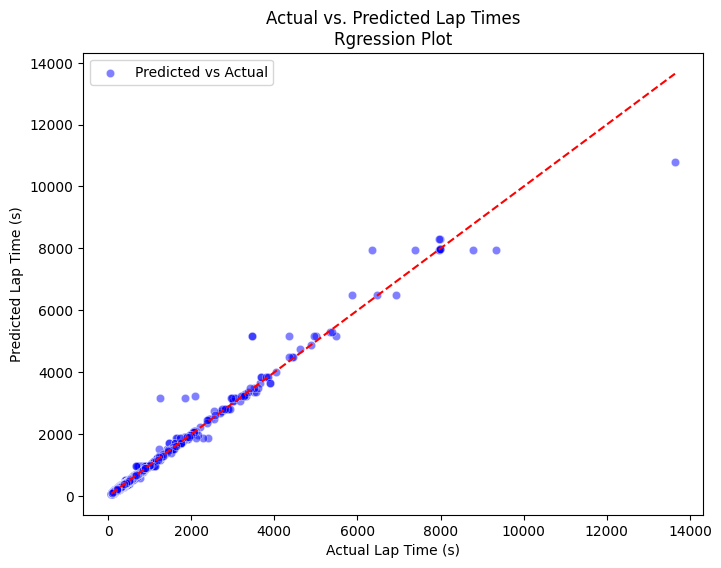

In [ ]:
x = joined_df[['top_speed', 'kph', 'position']]
y = joined_df['lap_time_s']


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred3, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--")  # Perfect Fit Line
plt.xlabel("Actual Lap Time (s)")
plt.ylabel("Predicted Lap Time (s)")
plt.title("Actual vs. Predicted Lap Times\nRgression Plot")
plt.legend()
plt.show()

## Visualization

#### Numerical Data

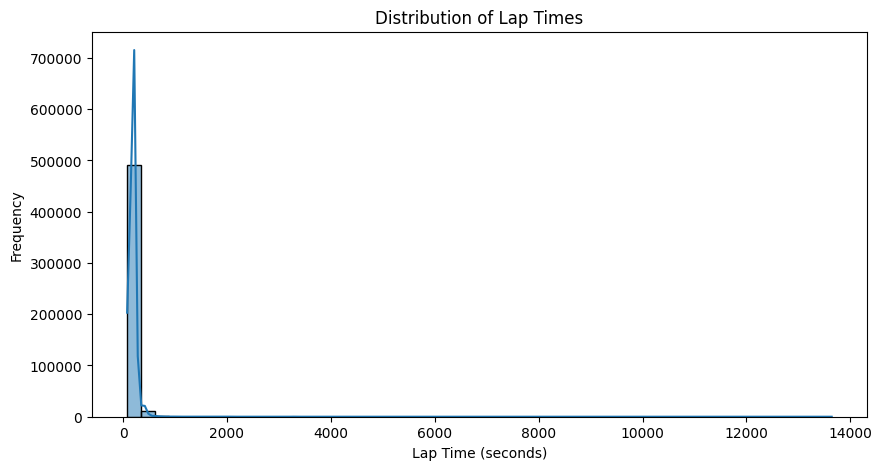

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['lap_time_s'], bins=50, kde=True)
plt.xlabel("Lap Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Lap Times")
plt.show()

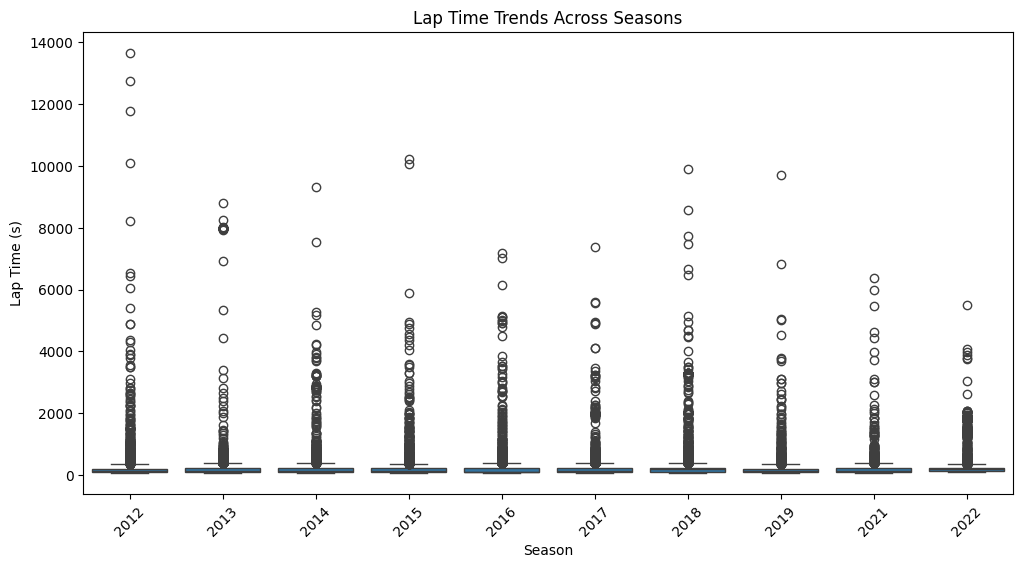

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='season_start', y='lap_time_s', data=df)
plt.xlabel("Season")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Trends Across Seasons")
plt.xticks(rotation=45)
plt.show()


C:\Users\joeva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


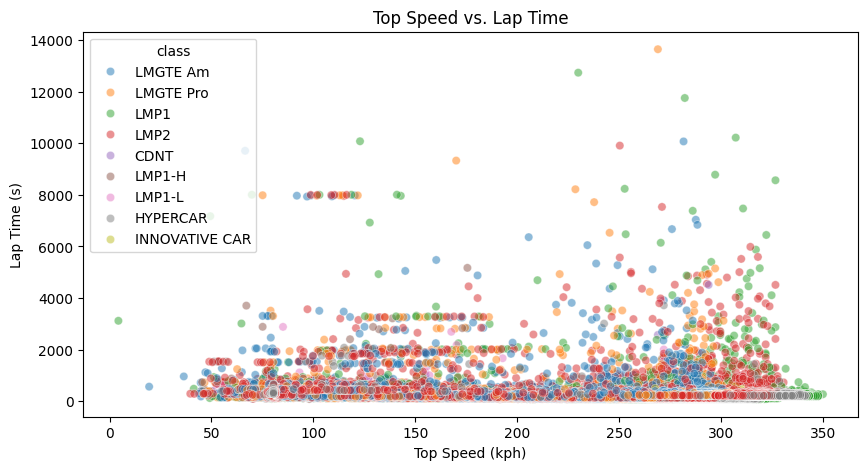

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='top_speed', y='lap_time_s',data=df,hue='class' ,alpha=0.5)
plt.xlabel("Top Speed (kph)")
plt.ylabel("Lap Time (s)")
plt.title("Top Speed vs. Lap Time")
plt.show()


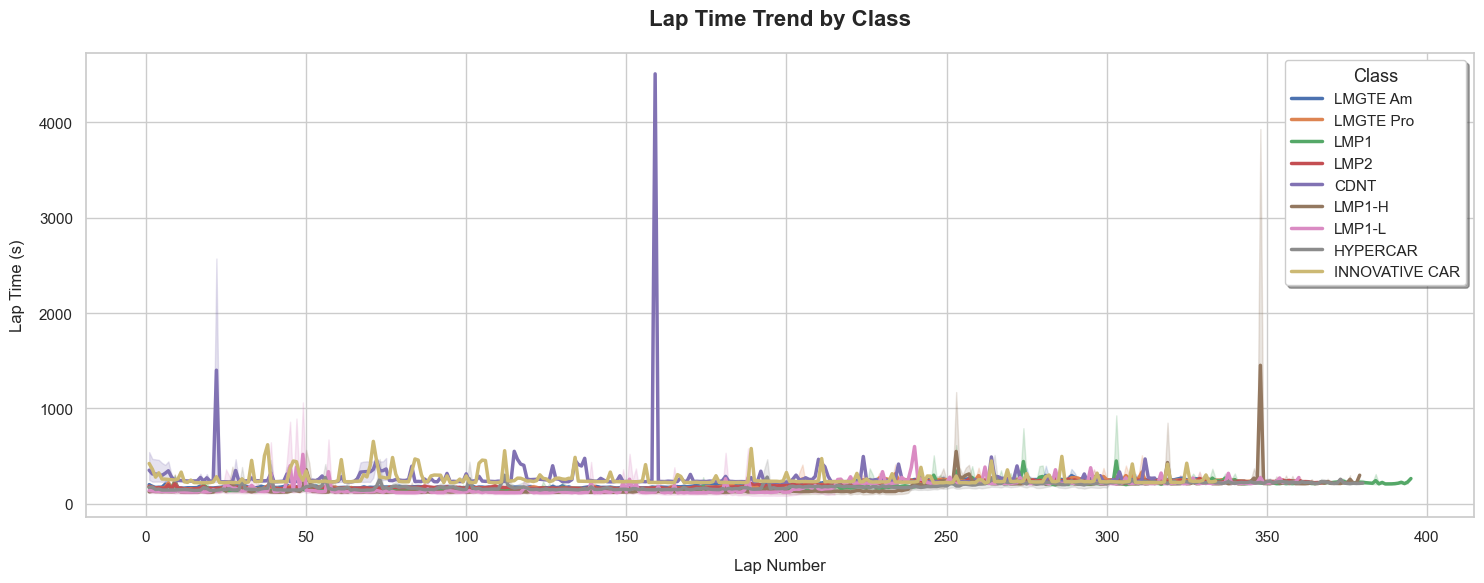

In [ ]:
plt.figure(figsize=(15,6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=df, x='lap_number',y='lap_time_s',hue='class',linewidth=2.5)
plt.title('Lap Time Trend by Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lap Number', fontsize=12, labelpad=10)
plt.ylabel('Lap Time (s)', fontsize=12, labelpad=10)
plt.legend(title='Class', title_fontsize='13', loc='upper right', frameon=True, shadow=True, fontsize=11)
plt.tight_layout()
plt.show()

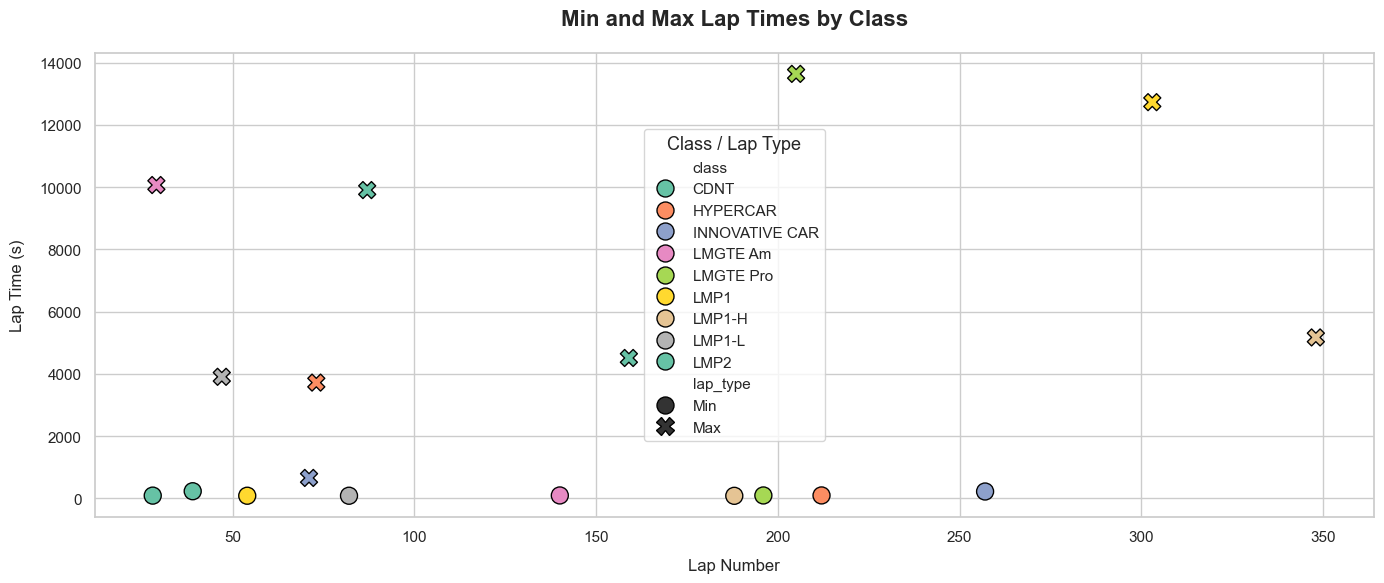

In [ ]:

# Get min and max lap times for each class
min_laps = df.loc[df.groupby('class')['lap_time_s'].idxmin()]
max_laps = df.loc[df.groupby('class')['lap_time_s'].idxmax()]

# Add a column to indicate whether it's min or max
min_laps['lap_type'] = 'Min'
max_laps['lap_type'] = 'Max'

# Combine both
extreme_laps = pd.concat([min_laps, max_laps])

plt.figure(figsize=(14,6))
sns.set_theme(style='whitegrid')
sns.scatterplot(data=extreme_laps, x='lap_number', y='lap_time_s',
                hue='class', style='lap_type', s=150, palette='Set2', edgecolor='black')

plt.title('Min and Max Lap Times by Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lap Number', fontsize=12, labelpad=10)
plt.ylabel('Lap Time (s)', fontsize=12, labelpad=10)
plt.legend(title='Class / Lap Type', title_fontsize=13, fontsize=11, loc='best')
plt.tight_layout()
plt.show()


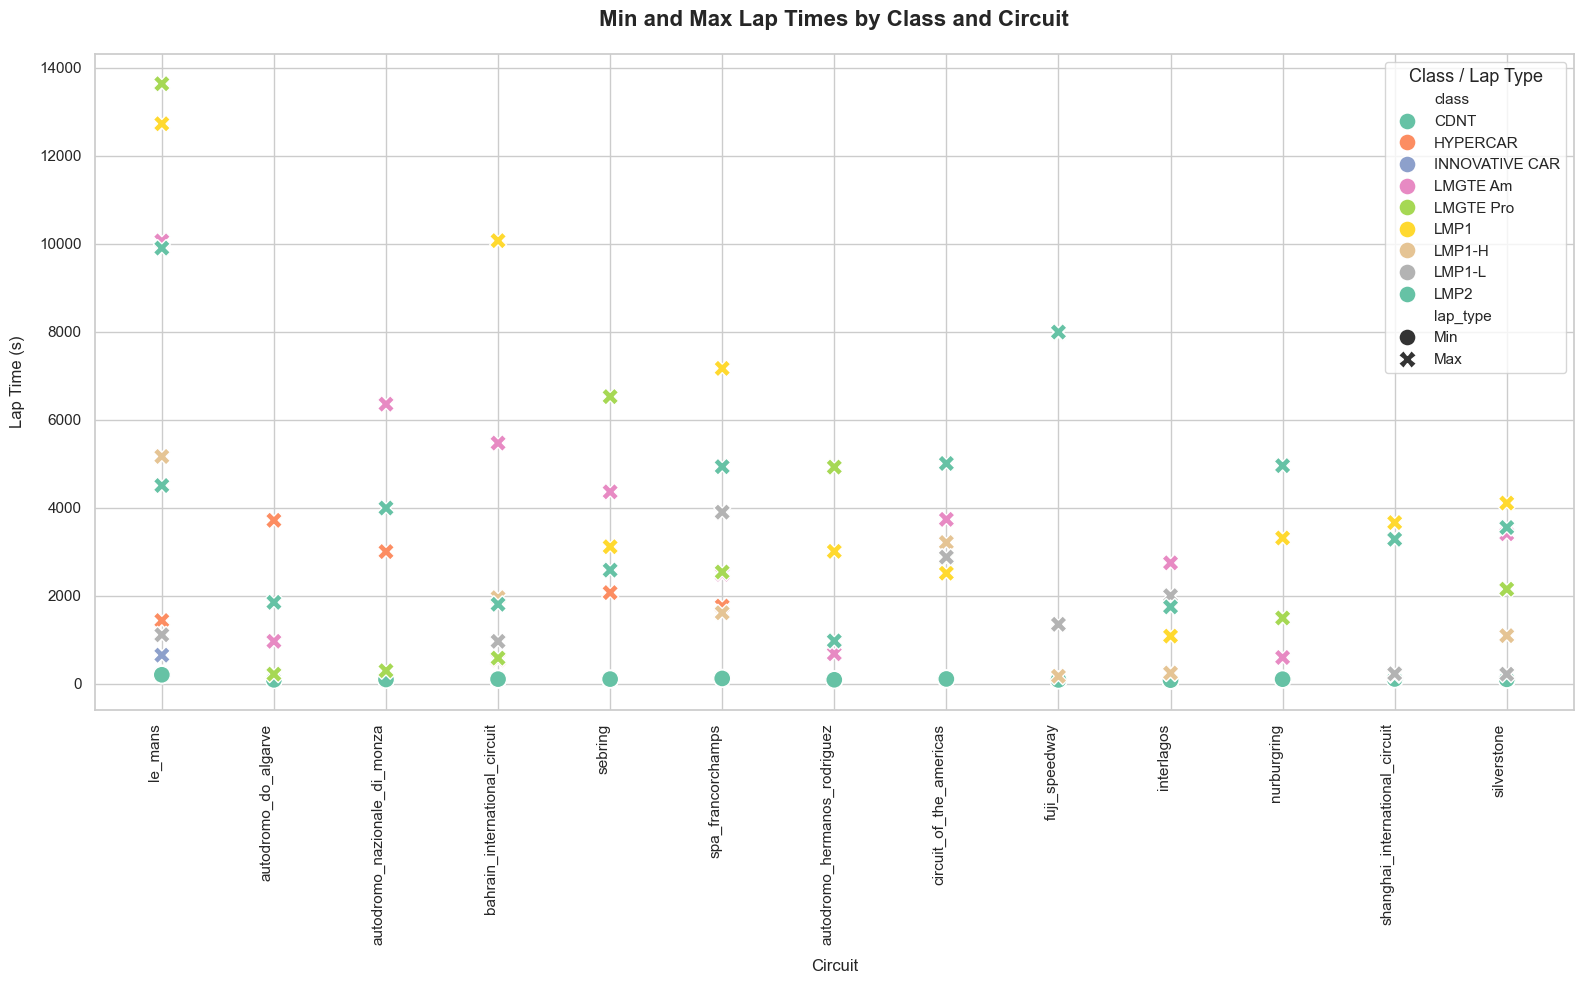

In [ ]:
# Get min and max lap times for each class at each circuit
min_laps = df.loc[df.groupby(['class', 'circuit'])['lap_time_s'].idxmin()]
max_laps = df.loc[df.groupby(['class', 'circuit'])['lap_time_s'].idxmax()]
marker_map = {'Min': 'o', 'Max': 'X'}


# Add lap type labels
min_laps['lap_type'] = 'Min'
max_laps['lap_type'] = 'Max'

# Combine both
extreme_laps = pd.concat([min_laps, max_laps])

# Plot
plt.figure(figsize=(16,10))
sns.set_theme(style='whitegrid')
sns.scatterplot(data=extreme_laps, x='circuit', y='lap_time_s',
                hue='class', style='lap_type',markers=marker_map, s=150, palette='Set2')

plt.title('Min and Max Lap Times by Class and Circuit', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Circuit', fontsize=12, labelpad=10)
plt.ylabel('Lap Time (s)', fontsize=12, labelpad=10)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Class / Lap Type', title_fontsize=13, fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()


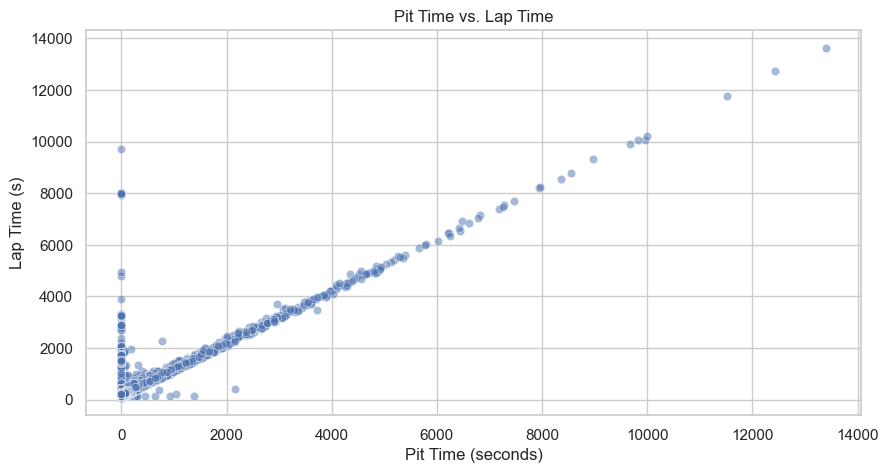

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pit_time', y='lap_time_s',data=joined_df, alpha=0.5)
plt.xlabel("Pit Time (seconds)")
plt.ylabel("Lap Time (s)")
plt.title("Pit Time vs. Lap Time")
plt.show()


#### Categorical data

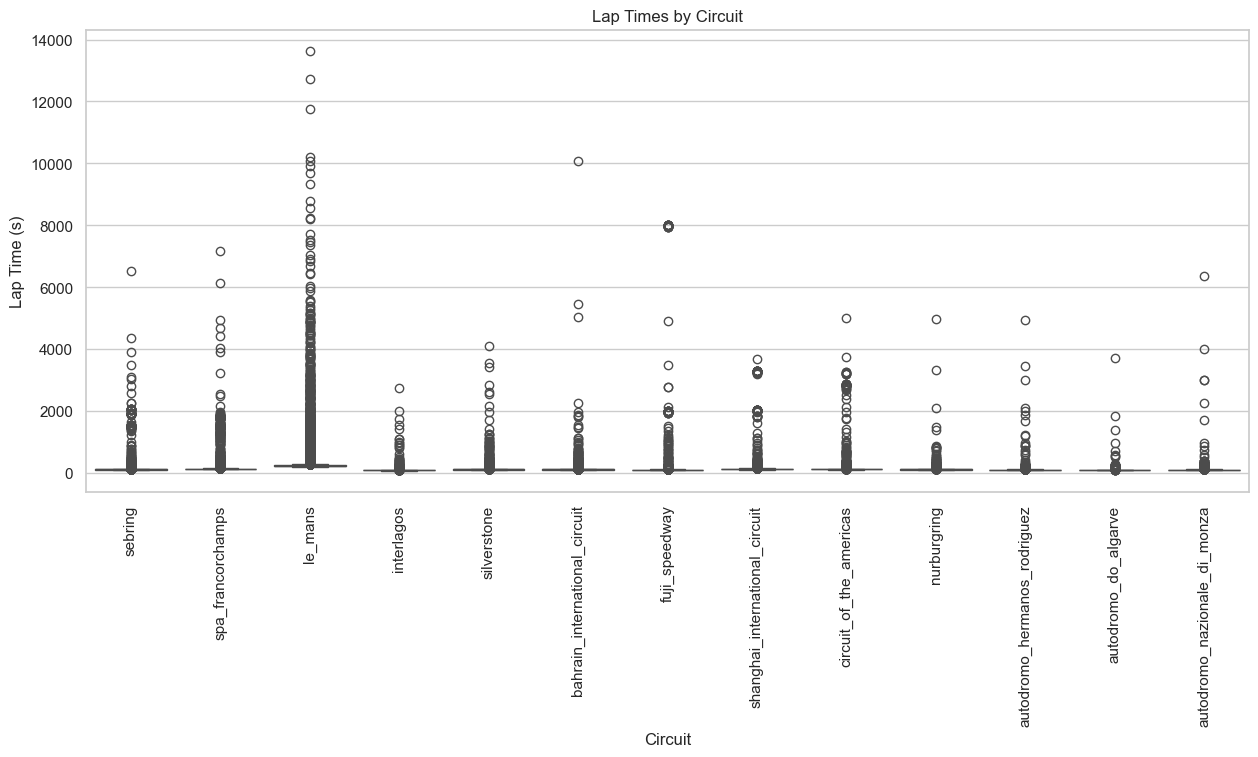

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['circuit'], y=joined_df['lap_time_s'])
plt.xlabel("Circuit")
plt.ylabel("Lap Time (s)")
plt.title("Lap Times by Circuit")
plt.xticks(rotation=90)
plt.show()


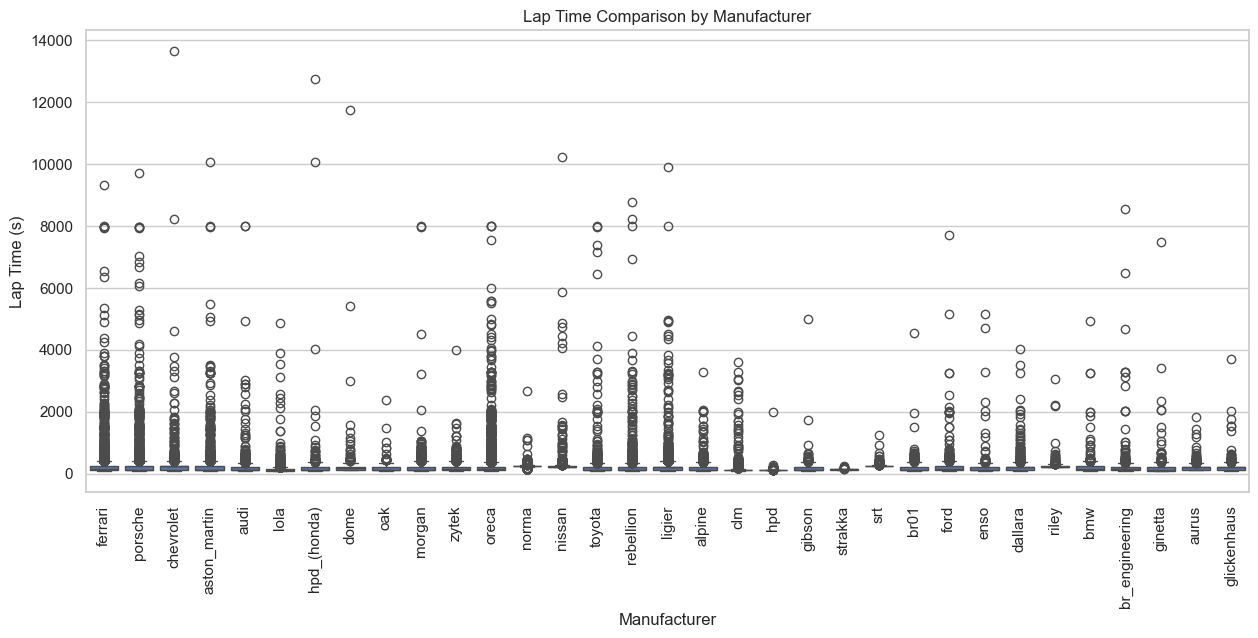

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='manufacturer', y='lap_time_s', data=df)
plt.xlabel("Manufacturer")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Comparison by Manufacturer")
plt.xticks(rotation=90)
plt.show()


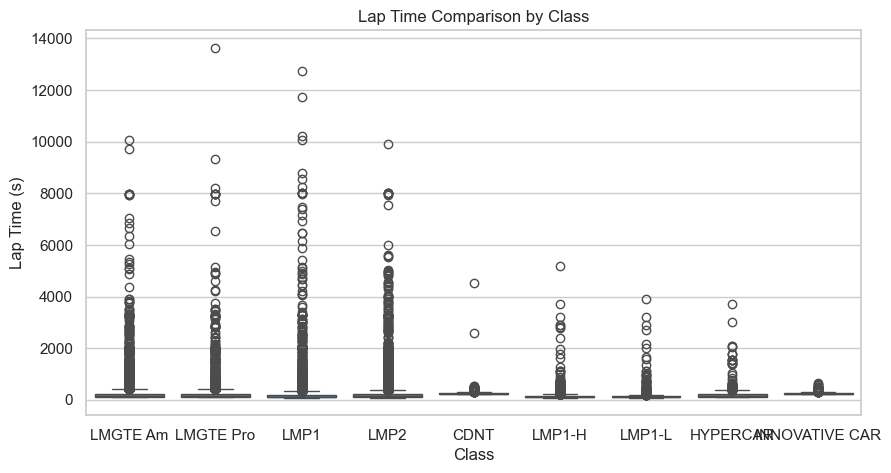

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='lap_time_s', data=df)
plt.xlabel("Class")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Comparison by Class")
plt.show()
